### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the training and testing dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale the Intensity of Images
x_train = x_train / 255
x_test = x_test / 255

# Add Input Layer , Hidden Layers and Output Layer
#### Using LSTM  and Relu as Activation function
#### I have add two LSTM layers for better accuracy

In [3]:
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.LSTM(100,input_shape = (28,28), return_sequences=True, activation='relu'))
Model.add(tf.keras.layers.LSTM(100, return_sequences=False, activation='relu'))
Model.add(tf.keras.layers.Dense(10))

### Compile and Fit the Model

In [4]:
Model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=["accuracy"]
)
Model.fit(x_train, y_train,batch_size = 100 , epochs=5, verbose=1)

Epoch 1/5
600/600 [==============================] - 25s 39ms/step - loss: 0.5644 - accuracy: 0.8152
Epoch 2/5
600/600 [==============================] - 25s 42ms/step - loss: 0.1418 - accuracy: 0.9560
Epoch 3/5
600/600 [==============================] - 26s 43ms/step - loss: 0.0937 - accuracy: 0.9712
Epoch 4/5
600/600 [==============================] - 26s 43ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 5/5
600/600 [==============================] - 27s 44ms/step - loss: 0.0583 - accuracy: 0.9819


### Evaluate the testing dataset

In [5]:
Model.evaluate(     
      x_test,
      y_test,
      batch_size = 100,
      verbose=1
)

100/100 [==============================] - 2s 13ms/step - loss: 0.0565 - accuracy: 0.9818


[0.05652004852890968, 0.9818000197410583]

### Print the Predicted Digits

In [6]:
y_predicted = Model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
print()
print(y_predicted)

313/313 [==============================] - 2s 6ms/step

[7, 2, 1, 0, 4, 1, 4, 9, 9, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1

### Visualize and Compare Predicted output with Actual output using Heatmap

Text(348.0000000000001, 0.5, 'Actual Digits')

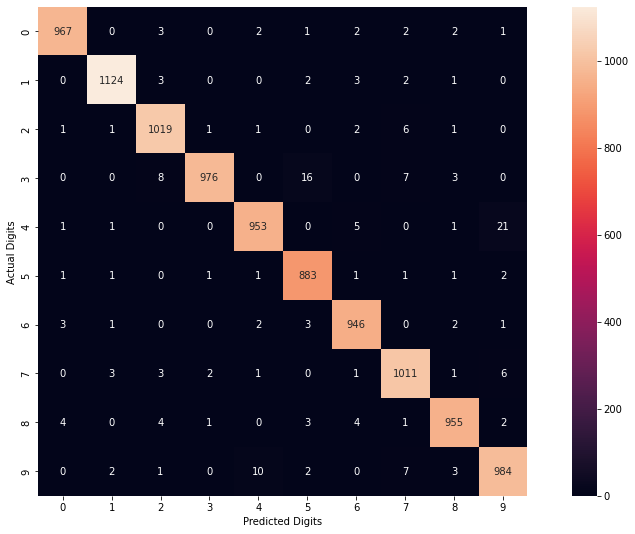

In [7]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize = (16,9))
sns.heatmap(conf_matrix, annot = True,fmt='d',square = True)
plt.xlabel('Predicted Digits')
plt.ylabel('Actual Digits')